# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [380]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [171]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [172]:
df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [174]:
# Vejo que a categoria Income está como object e o ideal para tirar uma média e mediana para uma analise sera deixar em float
df["Income"] = df["Income"].str.replace(".", "", regex=False)
df["Income"] = df["Income"].astype(int)

In [175]:
df.dtypes

Age                   float64
Gender                 object
Income                  int32
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [176]:
df.isnull().sum()

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64

In [177]:
(df.isnull().sum() / len(df)) * 100

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [178]:
df[df["Age"].isnull()]

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
8,NaN,Female,8000000,Master's Degree,Married,2,Owned,High
9,NaN,Male,10500000,Doctorate,Single,0,Owned,High
10,NaN,Female,9000000,High School Diploma,Married,1,Owned,High
11,NaN,Male,13500000,Bachelor's Degree,Married,0,Owned,High
12,NaN,Female,3500000,High School Diploma,Single,0,Rented,Low
13,NaN,Male,5500000,Associate's Degree,Single,0,Rented,Average
14,NaN,Female,7000000,Bachelor's Degree,Married,2,Owned,High
15,NaN,Male,9500000,Master's Degree,Single,0,Owned,High
16,NaN,Female,8500000,Doctorate,Married,1,Owned,High
17,NaN,Male,12500000,High School Diploma,Married,0,Owned,High


In [179]:
# Acredito que as idade nulas sejam apenas erros talvez de sistema, pelo fato de que os restos das categorias não contem erros nem valores nulos.
# Vemos na parte de idade (Age) temos 20% de dados nulos, vamos fazer uma analise e ver se é ideal substituir ou excluir
df["Age"].mean()

37.50769230769231

In [180]:
df["Age"].median()

36.0

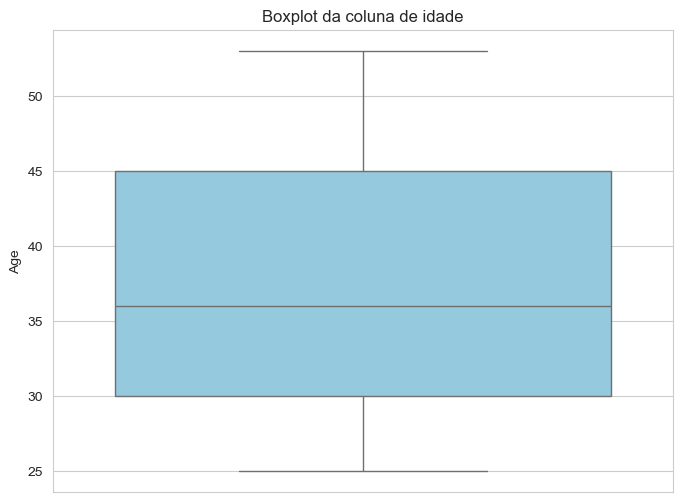

In [181]:
# Vemos que a média e pouca coisa maior que a mediana, acredito que não tenhamos valores outliers aqui, mas o ideal é analisar para ter certeza
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="Age", color="skyblue")
plt.title("Boxplot da coluna de idade")
plt.ylabel("Age")
plt.show()

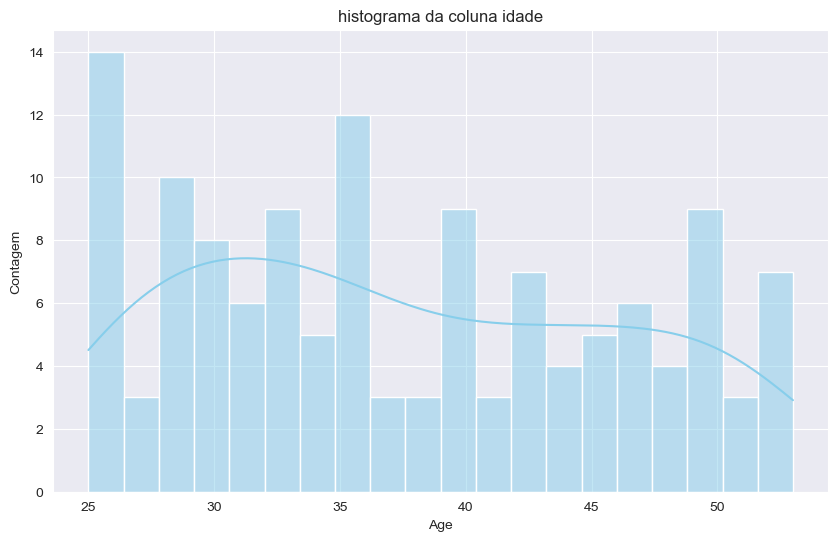

In [183]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", bins=20, kde=True, color="skyblue")
plt.title("histograma da coluna idade")
plt.xlabel("Age")
plt.ylabel("Contagem")
plt.show()

In [184]:
# Como eu disse acima, não via outliers e de fato não tem, vemos uma categoria bem distribuida e acredito que os valores nulos sejam apenas erros, ou na digitação ou do sistema 
# como os valores nulos são em média 20% da nossa base, irei substituir eles pela propria mediana já que elas estão próximas e isso mantém a base de dados completa sem introduzir muitos vieses.
age_mediana = df["Age"].median()
df["Age"] = df["Age"].fillna(age_mediana)

In [185]:
df["Age"].isnull().sum()

0

In [186]:
df["Age"].median()

36.0

In [187]:
(df.isnull().sum() / len(df)) * 100

Age                   0.0
Gender                0.0
Income                0.0
Education             0.0
Marital Status        0.0
Number of Children    0.0
Home Ownership        0.0
Credit Score          0.0
dtype: float64

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [188]:
df.describe()

,Age,Income,Number of Children
count,164.000000,1.640000e+02,164.000000
mean,37.195122,8.376524e+06,0.652439
std,7.586619,3.245731e+06,0.883346
min,25.000000,2.500000e+06,0.000000
25%,31.750000,5.750000e+06,0.000000
50%,36.000000,8.375000e+06,0.000000
75%,43.000000,1.050000e+07,1.000000
max,53.000000,1.625000e+07,3.000000


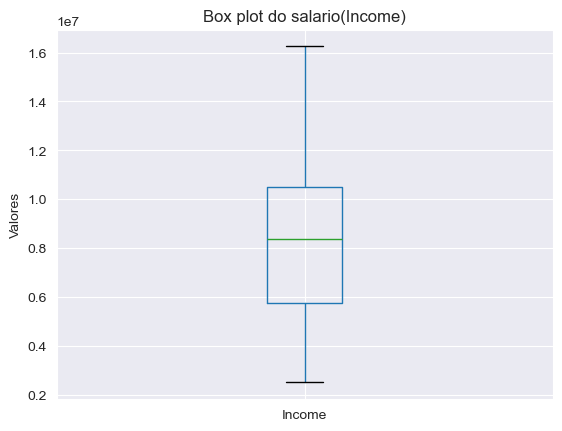

In [189]:
df.boxplot(column="Income")
plt.title("Box plot do salario(Income)")
plt.ylabel("Valores")
plt.show()

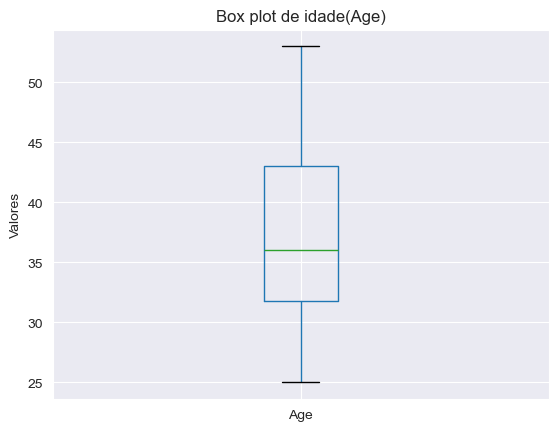

In [190]:
df.boxplot(column="Age")
plt.title("Box plot de idade(Age)")
plt.ylabel("Valores")
plt.show()

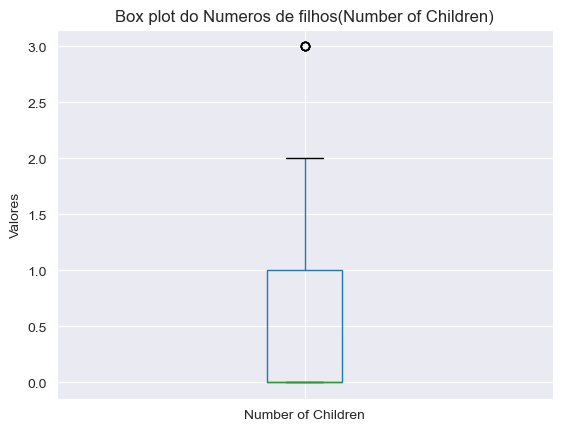

In [191]:
df.boxplot(column="Number of Children")
plt.title("Box plot do Numeros de filhos(Number of Children)")
plt.ylabel("Valores")
plt.show()

In [192]:
# Vemos um pequeno outlier na categoria (Number of Children) que seria a quantidade de filhos, porém... pode ser de fato um erro ou apenas um alguém que tenha 3 filhos
# Vamos analisar 
df[df["Number of Children"] == 3].head(5)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
4,45.0,Female,10000000,Bachelor's Degree,Married,3,Owned,High
33,45.0,Female,10500000,Bachelor's Degree,Married,3,Owned,High
65,45.0,Female,11000000,Bachelor's Degree,Married,3,Owned,High
97,45.0,Female,11500000,Bachelor's Degree,Married,3,Owned,High
139,45.0,Female,10500000,Bachelor's Degree,Married,3,Owned,High


In [193]:
# Vemos que apenas 5 pessoa tem 3 filhos no df, todos os dados são literalmente iguais, porém o salário varia e é um pouco diferente, apenas dois dalários são iguais
# E entre as 5 mulheres, todas elas tem 45 anos, acredito que possa ser um erro de dados duplicados, todos os dados são literalmente iguais, só o salario que varia porém também é parecido
# Acredito que o ideal seja excluir, por que ? pelo fato de saber que esse dados serão usado como aprendizagem de maquina, provalvel qualquer mulher que tiver 3 filhos e os restantes dos dados forem iguais, a aprendizagem vai dar um score de credito alto só por conta disso.
mais_de_3filhos = df[df["Number of Children"] == 3].index

In [194]:
df = df.drop(mais_de_3filhos)

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [195]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,5000000,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,10000000,Master's Degree,Married,2,Owned,High
2,35.0,Female,7500000,Doctorate,Married,1,Owned,High
3,40.0,Male,12500000,High School Diploma,Single,0,Owned,High
5,50.0,Male,15000000,Master's Degree,Married,0,Owned,High


C:\Users\Facundo Atahides\AppData\Local\Temp\ipykernel_11816\1637620391.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



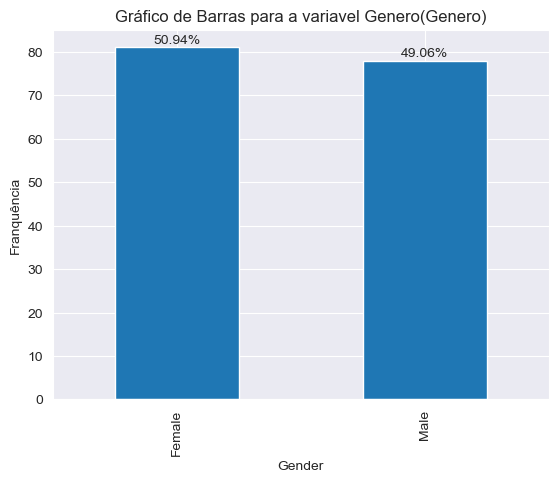

In [196]:
#seu código aquicontagem = df["Gender"].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind="bar")

for i, v in enumerate(contagem):
     ax.text(i, v + 1, f"{porcentagem[i]:.2f}%", ha="center")
plt.title("Gráfico de Barras para a variavel Genero(Genero)")
plt.xlabel("Gender")
plt.ylabel("Franquência")
plt.show()

In [ ]:
#A questão de genero é bem equilibrada, temos clientes homens e mulheres.

C:\Users\Facundo Atahides\AppData\Local\Temp\ipykernel_11816\3020437202.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



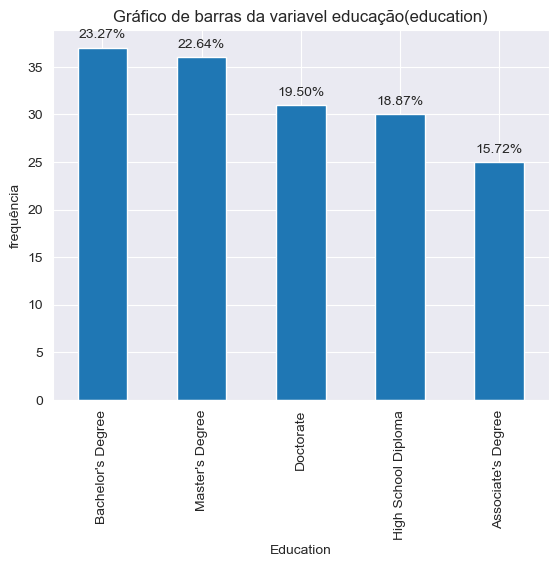

In [197]:
contagem = df["Education"].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind="bar")

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f"{porcentagem[i]:.2f}%", ha="center")
plt.title("Gráfico de barras da variavel educação(education)")
plt.xlabel("Education")
plt.ylabel("frequência")
plt.show()

In [ ]:
# Vemos uma boa distribuição na área de educação

C:\Users\Facundo Atahides\AppData\Local\Temp\ipykernel_11816\1899457295.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



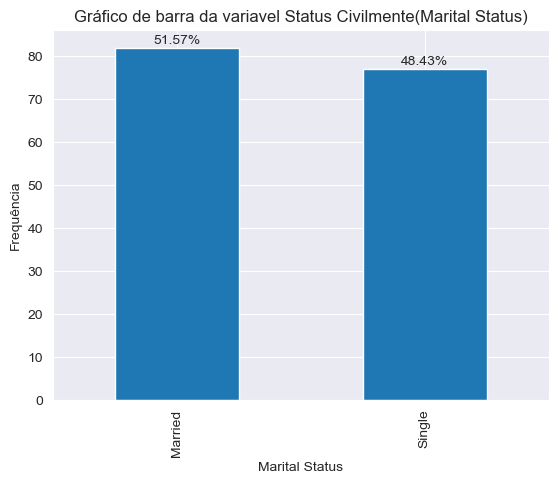

In [198]:
contagem = df["Marital Status"].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind="bar")

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f"{porcentagem[i]:.2f}%", ha="center")
plt.title("Gráfico de barra da variavel Status Civilmente(Marital Status)")
plt.xlabel("Marital Status")
plt.ylabel("Frequência")
plt.show()

In [ ]:
# Vemos também uma boa distrubuição entre casados e solteiros (Married = Casada) (Single = solteiro)

C:\Users\Facundo Atahides\AppData\Local\Temp\ipykernel_11816\1170053665.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



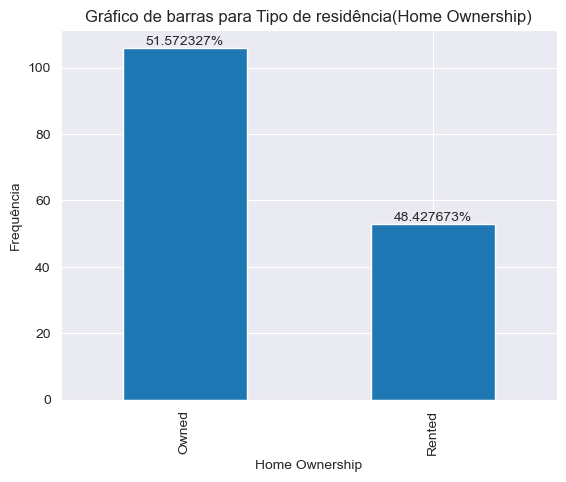

In [199]:
contagem = df["Home Ownership"].value_counts()
porcengtagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind="bar")

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f"{porcentagem[i]:2f}%", ha="center")
plt.title("Gráfico de barras para Tipo de residência(Home Ownership)")
plt.xlabel("Home Ownership")
plt.ylabel("Frequência")
plt.show()

In [ ]:
# Já aqui vemos um Balanceamento maior para owned (casa própria) do que para rented(casa alugada)

C:\Users\Facundo Atahides\AppData\Local\Temp\ipykernel_11816\1792394762.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



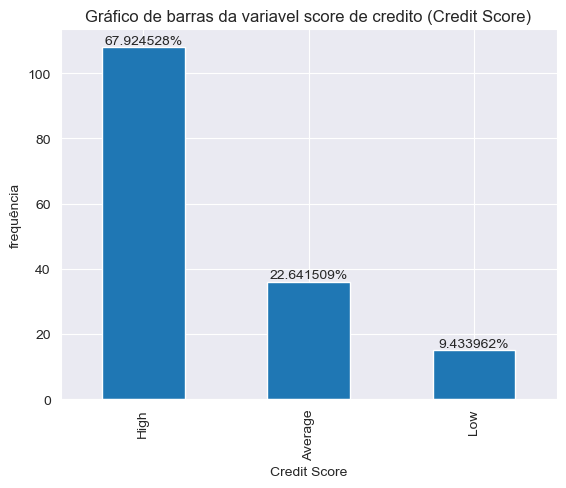

In [200]:
contagem = df["Credit Score"].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind="bar")

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f"{porcentagem[i]:2f}%", ha="center")
plt.title("Gráfico de barras da variavel score de credito (Credit Score)") 
plt.xlabel("Credit Score")
plt.ylabel("frequência")
plt.show()

In [201]:
# Vemos que a categoria Credit Score está um pouco desbalanceada, com 67% da nossa base com score alto, o score médio de 22% e o baixo de 9% 

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [ ]:
# A unica categoria que eu indentifiquei que tinha um outlier era a de "Number Childer" que era a quantidade filhos, porém o outlier que eu vi me pareceu um dado duplicado.
# E por centos motivos que eu deixei acima bem na analise decidi excluir.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



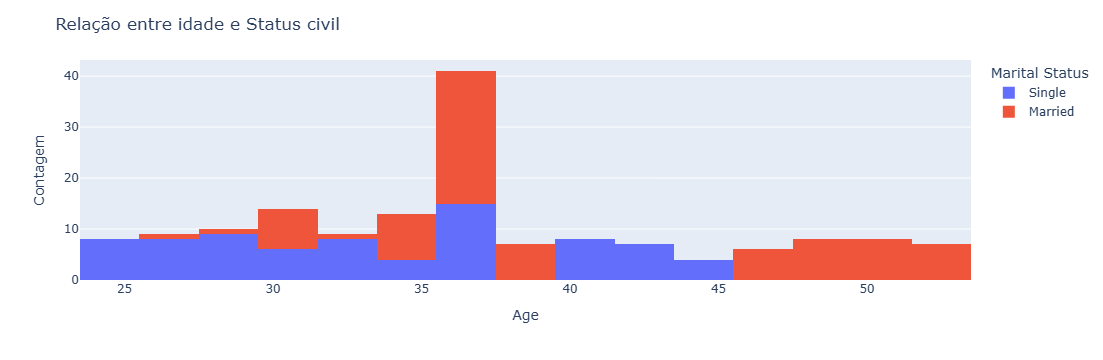

In [225]:
fig = px.histogram(df, x='Age', color='Marital Status', barmode='stack')

# Layout
fig.update_layout(title='Relação entre idade e Status civil',
                  xaxis_title='Age',
                  yaxis_title='Contagem',
                  legend_title='Marital Status')
fig.show()

In [ ]:
# Vemos que entre os 25 até os 30 anos a maioria das pessoas são solteiras, já dos 35 até os 40 boa parte é casada, entre os 40 a 45 todos são solteiros, e dos 46 até os 53 todos são casados
# A unica relação que vejo aqui é que, os mais jovens são solteiros, já entre os mais velhos(35 a 50) existe um balanço, porém boa parte nessa faixa é casado.

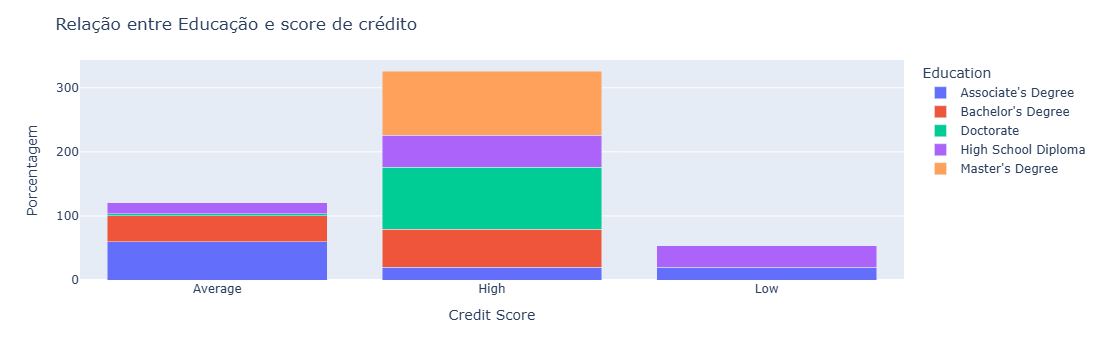

In [226]:
df_agrupa = df.groupby(["Education", "Credit Score"]).size().reset_index(name="count")
total_agrupa = df_agrupa.groupby("Education")["count"].transform("sum")
df_agrupa["percent"] = (df_agrupa["count"] / total_agrupa) * 100

fig = px.bar(df_agrupa, x="Credit Score", y="percent", color="Education", barmode="stack",
             labels={"Age": "Idade", "percent": "Porcentagem", "Education": "Educação"})

fig.update_layout(title="Relação entre Educação e score de crédito",
                  yaxis_title="Porcentagem",
                  legend_title="Education")
fig.show()

In [ ]:
# Fazendo um leve resumo, a maioria das pessoa que tem um nível educacional maior, tem uma relação maior com score.
# Vemos que 100% das pessoa que tem mestrado e 96% das pessoa que tem doutorado, elas tem um score alto.
# Já as pessoa que tem um nível educacional mais baixo ou mediano, acaba não tendo tanto score,
# Um exmplo disso é que as pessoa que tem diploma do ensino médio, elas tem apenas 50% de score alto, o resto varia pra médio ou baixo. 
# E os associados e os que tem baicharel variam entre baixo score ou medio. Apenas 20% deles tem o score alto. 

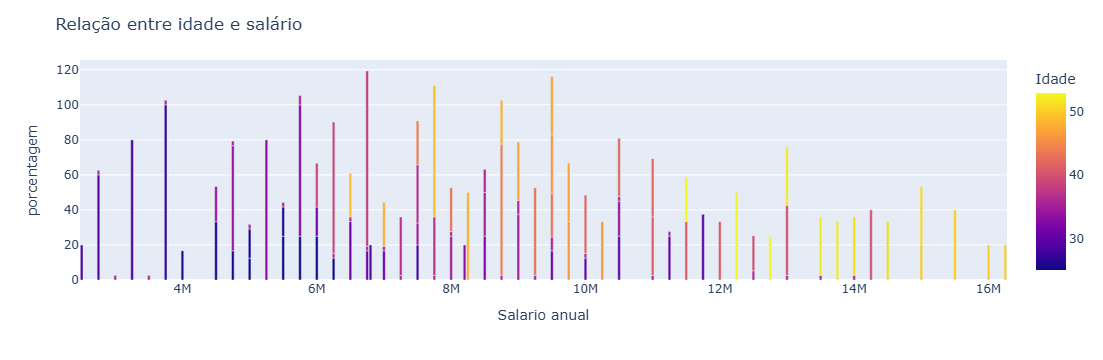

In [299]:
df_agrupa = df.groupby(["Age", "Income"]).size().reset_index(name="count")
total_agrupa = df_agrupa.groupby("Age")["count"].transform("sum")
df_agrupa["percent"] = (df_agrupa["count"] / total_agrupa) * 100

fig = px.bar(df_agrupa, x="Income", y="percent", color="Age", barmode="stack",
             labels={"Age": "Idade", "percent": "porcentagem", "Income": "Salario anual"})
fig.update_layout(title="Relação entre idade e salário ",
                  yaxis_title="porcentagem",
                  legend_title="Age")
fig.show()

In [ ]:
# Aqui vemos uma correlação, quanto maior a Idade das pessoas, vemos que maior fica o salario. 

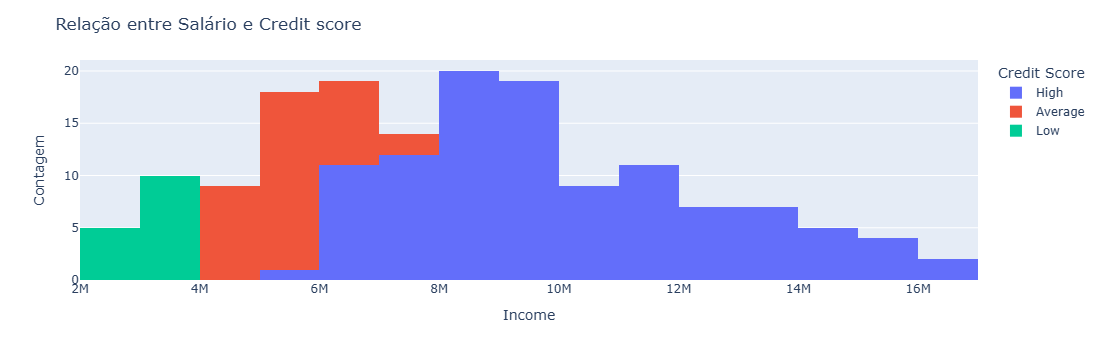

In [292]:
fig = px.histogram(df, x='Income', color='Credit Score', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Salário e Credit score',
                  xaxis_title='Income',
                  yaxis_title='Contagem',
                  legend_title='Credit Score')
fig.show()

In [ ]:
# Vejo que quanto maior o salário, maior o score de credito 

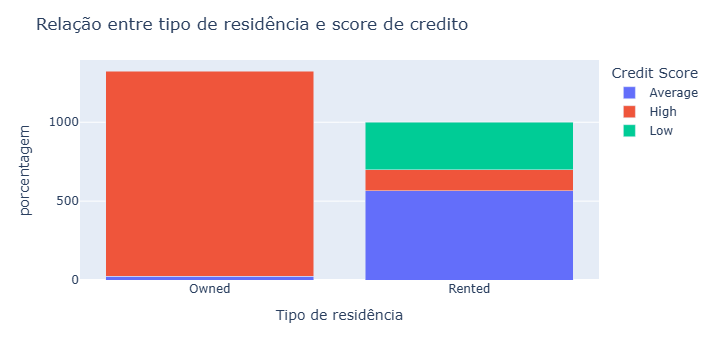

In [224]:
df_agrupar = df.groupby(["Home Ownership", "Credit Score"]).size().reset_index(name="count")
total_agrupar = df_agrupar.groupby("Home Ownership")["count"].transform("sum")
df_agrupar["percent"] = (df_agrupar["count"] / total_agrupa) * 100

fig = px.bar(df_agrupar, x="Home Ownership", y="percent", color="Credit Score", barmode="stack",
             labels={"Home Ownership": "Tipo de residência", "percent": "porcentagem", "Credit Score": "Credit Score"})
fig.update_layout(title="Relação entre tipo de residência e score de credito",
                  yaxis_title="porcentagem",
                  legend_title="Credit Score")
fig.show()

In [ ]:
# Consguimos ver que os clientes que tem casa propria tem um score de credito mais alto, mais de 97% da nossa base

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

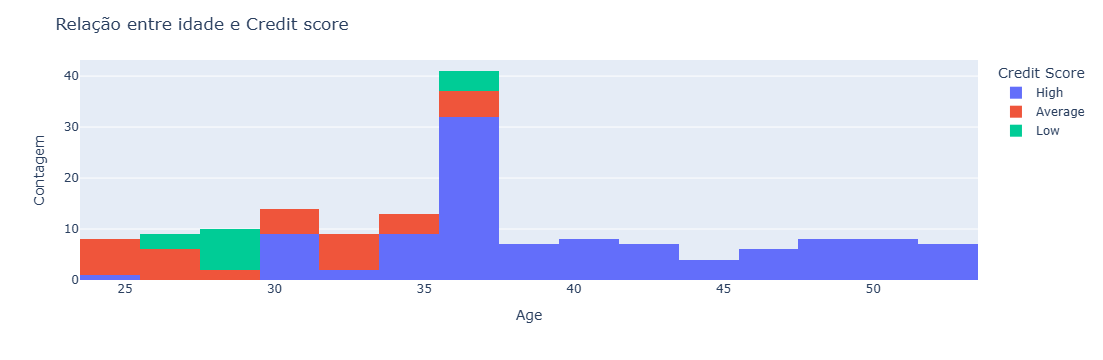

In [294]:
# Me pergunto se idade tem relação com score de credito
fig = px.histogram(df, x='Age', color='Credit Score', barmode='stack')

# Layout
fig.update_layout(title='Relação entre idade e Credit score',
                  xaxis_title='Age',
                  yaxis_title='Contagem',
                  legend_title='Credit Score')
fig.show()

In [ ]:
# Vejo que quanto maior a idade, mais alto o score fica, dos 25 até os 30 o score varia ente médio e baixo, depois dos 30 até 35 se tem um score mais médio, e logo depois dos 35 até os 50 só tem score alto
# Acredito que seja desse jeito por conta dos salários e idade também, quanto mais velho a pessoa é, mais dinheiro tem, e isso influencia a relação entre idade e score de credito

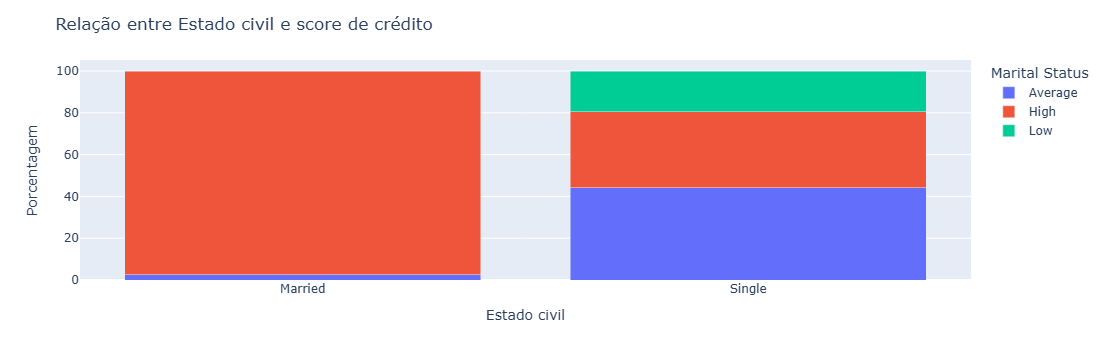

In [278]:
# sera que pessoa casadas tem um score de credito mais alto 
df_agrupa = df.groupby(["Marital Status", "Credit Score"]).size().reset_index(name="count")
total_agrupa = df_agrupa.groupby("Marital Status")["count"].transform("sum")
df_agrupa["percent"] = (df_agrupa["count"] / total_agrupa) * 100

fig = px.bar(df_agrupa, x="Marital Status", y="percent", color="Credit Score", barmode="stack",
             labels={"Age": "Idade", "percent": "Porcentagem", "Marital Status": "Estado civil"})

fig.update_layout(title="Relação entre Estado civil e score de crédito",
                  yaxis_title="Porcentagem",
                  legend_title="Marital Status")
fig.show()

In [ ]:
# E de fato sim, pessoas casadas tem um score de credito mais alto sim, cerca de 97%vda baae

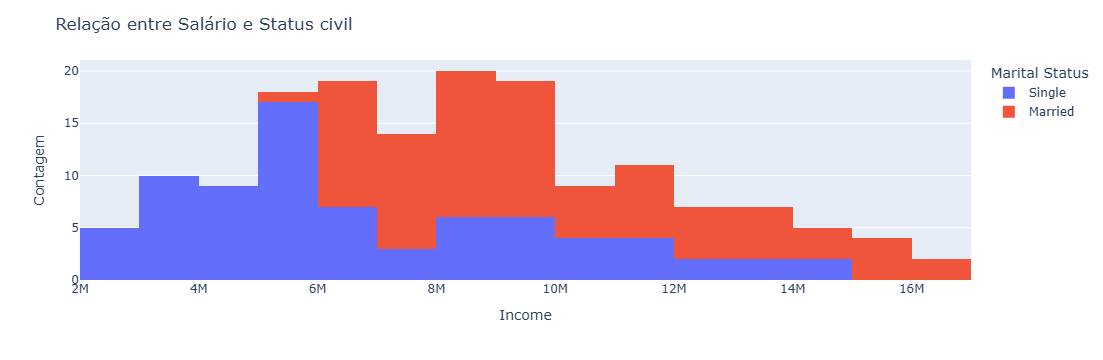

In [303]:
# Existe uma relação entre status civil e salário?
fig = px.histogram(df, x='Income', color='Marital Status', barmode='stack')
# Layout
fig.update_layout(title='Relação entre Salário e Status civil',
                  xaxis_title='Income',
                  yaxis_title='Contagem',
                  legend_title='Marital Status')
fig.show()

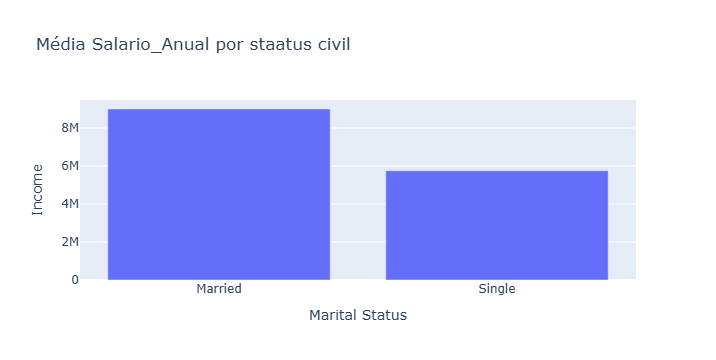

In [316]:
mediana = df.groupby('Marital Status')["Income"].median().reset_index()
fig = px.bar(mediana, x='Marital Status', y='Income',
             title='Média Salario_Anual por staatus civil')
fig.show()

In [ ]:
# de fato uma duvida que eu tinha era saber se os casado ou solteiros ganhavam mais, mas da pra ver que os casados ganham bem mais que os solteiros  

### Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

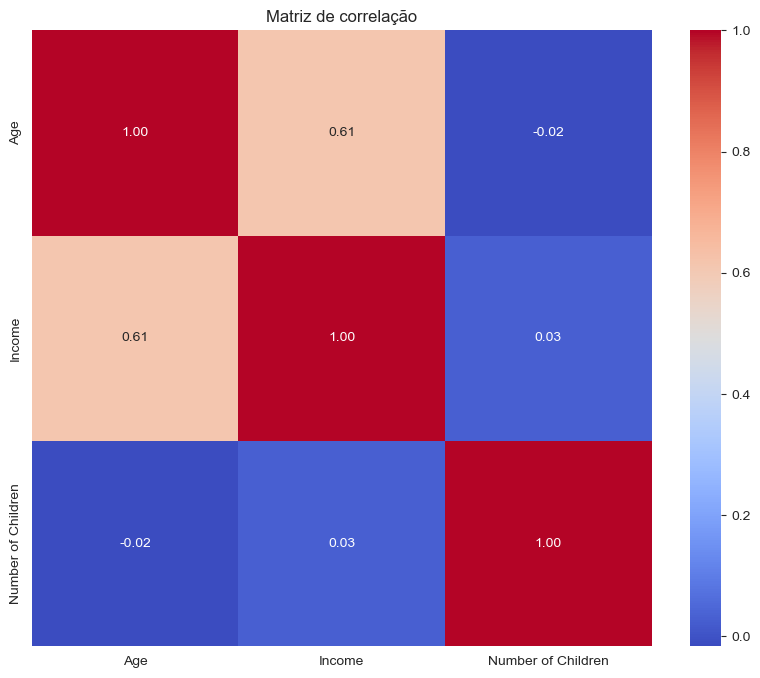

In [318]:
correlacao_matrix = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de correlação")
plt.show()

In [321]:
df.select_dtypes(include=["number"]).corr()

,Age,Income,Number of Children
Age,1.000000,0.613695,-0.016242
Income,0.613695,1.000000,0.027875
Number of Children,-0.016242,0.027875,1.000000


**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

In [ ]:
# As unicas variaveis que por enquanto que encontrei uma correlação é Idade com salário (Income e Age), porém é uma correlação baixa. 

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [329]:
from sklearn.preprocessing import LabelEncoder

Label_encoder = LabelEncoder()
df["Gender_encoder"] = label_encoder.fit_transform(df["Gender"])
# Na categoria educação irei usar o label também, se eu usar o one-hot aqui, ele vai criar mais 4 categorias, e creio que ficaria mais pesado, então vou optar pelo label encoder
df["Education_encoder"] = label_encoder.fit_transform(df["Education"])
df["Marital_Status_encoder"] = label_encoder.fit_transform(df["Marital Status"])
df["Home_Ownership_encoder"] = label_encoder.fit_transform(df["Home Ownership"])

# Já Aqui irei usar o one_hot pelo fato da categoria creditscore ter 3 variaveis, e nesse caso seria a melhor opção, diferente da categoria educação 
df = pd.get_dummies(df, columns=["Credit Score"], prefix="Credit Score", drop_first=True)
print(df)

      Age  Gender    Income            Education Marital Status  \
0    25.0  Female   5000000    Bachelor's Degree         Single   
1    30.0    Male  10000000      Master's Degree        Married   
2    35.0  Female   7500000            Doctorate        Married   
3    40.0    Male  12500000  High School Diploma         Single   
5    50.0    Male  15000000      Master's Degree        Married   
..    ...     ...       ...                  ...            ...   
159  29.0  Female   2750000  High School Diploma         Single   
160  34.0    Male   4750000   Associate's Degree         Single   
161  39.0  Female   6250000    Bachelor's Degree        Married   
162  44.0    Male   8750000      Master's Degree         Single   
163  49.0  Female   7750000            Doctorate        Married   

     Number of Children Home Ownership  Gender_encoder  Education_encoder  \
0                     0         Rented               0                  1   
1                     2          Owned   

In [331]:
# Vou converter agora as categorias que ficaram boleanas
for column in df.columns:
    if df[column].dtype == "bool":
        df[column] = df[column].astype(int)
print(df)        

      Age  Gender    Income            Education Marital Status  \
0    25.0  Female   5000000    Bachelor's Degree         Single   
1    30.0    Male  10000000      Master's Degree        Married   
2    35.0  Female   7500000            Doctorate        Married   
3    40.0    Male  12500000  High School Diploma         Single   
5    50.0    Male  15000000      Master's Degree        Married   
..    ...     ...       ...                  ...            ...   
159  29.0  Female   2750000  High School Diploma         Single   
160  34.0    Male   4750000   Associate's Degree         Single   
161  39.0  Female   6250000    Bachelor's Degree        Married   
162  44.0    Male   8750000      Master's Degree         Single   
163  49.0  Female   7750000            Doctorate        Married   

     Number of Children Home Ownership  Gender_encoder  Education_encoder  \
0                     0         Rented               0                  1   
1                     2          Owned   

In [332]:
# Agora vou excluir as colunas com os atributos categóricos
df = df.drop(["Home Ownership"], axis=1)
df = df.drop(["Gender"], axis=1)
df = df.drop(["Education"], axis=1)
df = df.drop(["Marital Status"], axis=1)

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

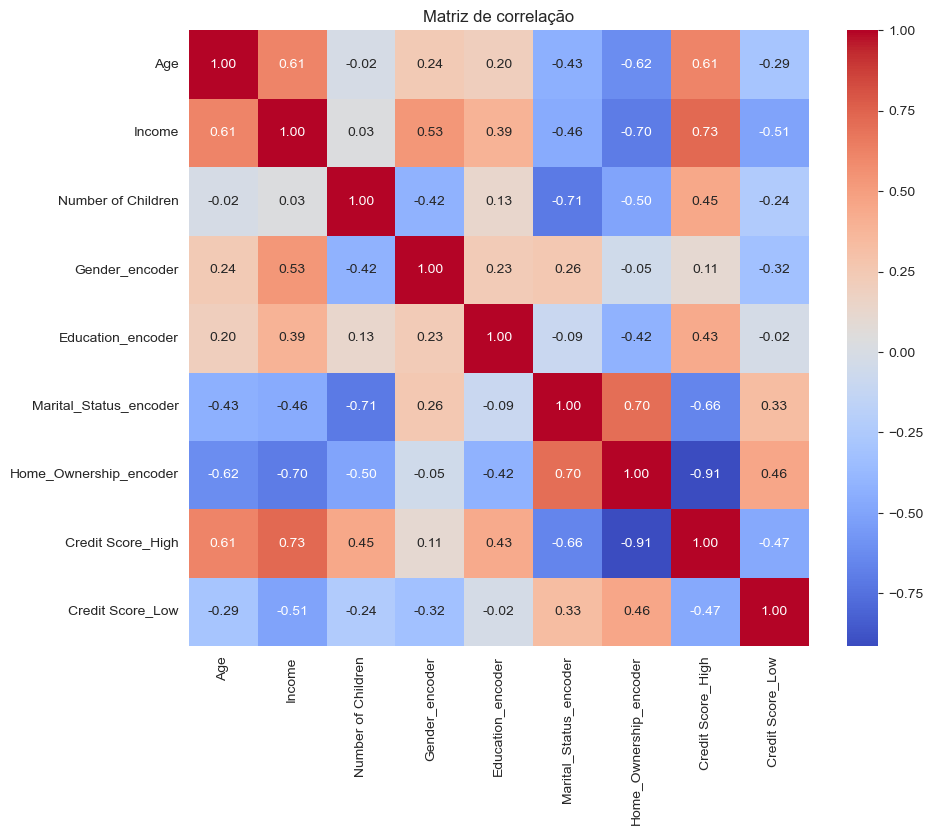

In [333]:
correçacao_matrix = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correçacao_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de correlação")
plt.show()

In [334]:
# vejo agora que temos novas variaveis vemos fortes correlações

# Vejo que o score de credito alto tem uma forte correlação positiva com o Salário.
# Também vejo uma correlação negativa entre score alto e tipo de residência (score e Home).
# Vemos também correlações positivas entre idade e salario.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [336]:
x = df.drop(["Credit Score_Low", "Credit Score_High"], axis=1)
y = df[["Credit Score_Low", "Credit Score_High"]]

In [337]:
from sklearn.model_selection import train_test_split

In [339]:
# Separando os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [340]:
# Vamos agora analisar e ver se está tudo correto 
x_train

,Age,Income,Number of Children,Gender_encoder,Education_encoder,Marital_Status_encoder,Home_Ownership_encoder
27,44.0,7500000,0,1,4,1,0
142,31.0,6500000,0,1,1,1,1
151,36.0,9000000,1,0,2,0,0
93,25.0,6250000,0,0,1,1,1
69,36.0,9000000,2,0,4,0,0
...,...,...,...,...,...,...,...
74,32.0,5750000,0,1,0,1,1
110,52.0,13750000,0,1,3,0,0
15,36.0,9500000,0,1,4,1,0
95,35.0,9000000,1,0,2,0,0


In [341]:
x_test

,Age,Income,Number of Children,Gender_encoder,Education_encoder,Marital_Status_encoder,Home_Ownership_encoder
81,36.0,6750000,2,0,1,0,0
160,34.0,4750000,0,1,0,1,1
132,32.0,8500000,0,1,4,1,1
57,49.0,7750000,1,0,2,0,0
98,50.0,16250000,0,1,4,0,0
30,30.0,10500000,2,1,4,0,0
152,36.0,13000000,0,1,3,0,0
53,29.0,2750000,0,0,3,1,1
102,41.0,12000000,0,1,2,1,0
146,36.0,14000000,0,1,1,0,0


In [342]:
y_train

,Credit Score_Low,Credit Score_High
27,0,1
142,0,0
151,0,1
93,0,0
69,0,1
...,...,...
74,0,0
110,0,1
15,0,1
95,0,1


In [343]:
y_test

,Credit Score_Low,Credit Score_High
81,0,1
160,0,0
132,0,1
57,0,1
98,0,1
30,0,1
152,0,1
53,1,0
102,0,1
146,0,1


In [344]:
print("Tamanho do x_train", x_train.shape)

Tamanho do x_train (119, 7)


In [346]:
print("Tamanho do x_test", x_test.shape)

Tamanho do x_test (40, 7)


In [347]:
print("Tamanho do y_train", y_train.shape)

Tamanho do y_train (119, 2)


In [348]:
print("Tamanho de y_test", y_test.shape)

Tamanho de y_test (40, 2)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='Credit Score_Low,Credit Score_High'>

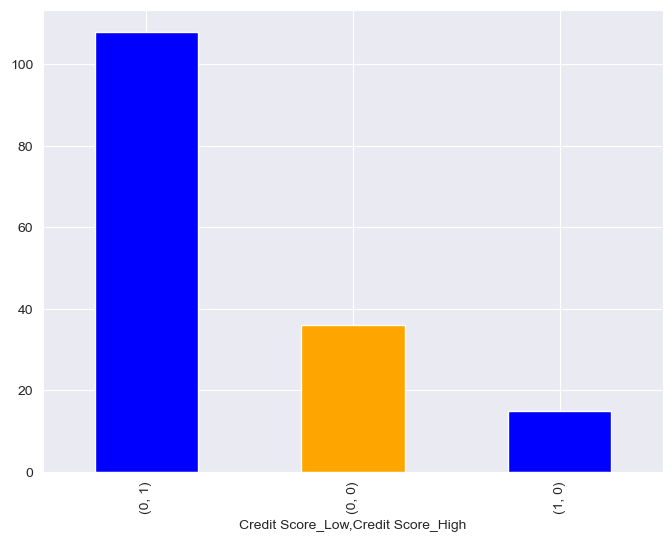

In [357]:
mediana = df.groupby('Credit Score_Low')["Credit Score_High"].value_counts()
plt.figure(figsize=(8, 6))
mediana.plot(kind="bar", color=["blue", "orange"]) 

In [360]:
# Vamos calcular agora e ver as porcentagens
print((df["Credit Score_Low"].value_counts(normalize=True) * 100))
print((df["Credit Score_High"].value_counts(normalize=True) * 100))

Credit Score_Low
0    90.566038
1     9.433962
Name: proportion, dtype: float64
Credit Score_High
1    67.924528
0    32.075472
Name: proportion, dtype: float64


In [ ]:
# Caso as porcentagens tenham ficado difíceis de compreender 
# 9% têm um score baixo.
# 68% têm um score alto.
# 32% têm um score médio.

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [371]:
from imblearn.over_sampling import SMOTE

In [374]:
#Como eu usei one-hot, descobri que é mais dificl trabalhar com smote, pois, então tive que
# converter de novo para rótulos únicos e depois reaplicar o one-hot
y_train_single_label = y_train.idxmax(axis=1)
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train_single_label)
print("Distribuição das classes após o balanceamento")
print(pd.Series(y_train_balanced).value_counts())

y_train_balanced_onehot = pd.get_dummies(y_train_balanced)
print("Distribuição das classes após o One-Hot Encoding")
print(y_train_balanced_onehot.value_counts())


Distribuição das classes após o balanceamento
Credit Score_High    81
Credit Score_Low     81
Name: count, dtype: int64
Distribuição das classes após o One-Hot Encoding
Credit Score_High  Credit Score_Low
False              True                81
True               False               81
Name: count, dtype: int64


In [375]:
train_balanced = y_train_balanced.value_counts()
print("Balanceamento em y_train:")
print(train_balanced)

Balanceamento em y_train:
Credit Score_High    81
Credit Score_Low     81
Name: count, dtype: int64


In [376]:
y_train_balanced.to_csv("y_train_balanced.csv", index=False)

In [377]:
x_train_balanced.to_csv("x_train_balanced.csv", index=False)

In [378]:
y_test.to_csv("y_test.csv", index=False)

In [379]:
x_test.to_csv("x_test.csv", index=False)